# 주성분

In [1]:
# 데이터 구성
import pandas as pd
import numpy as np

# 데이터 시각화
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# export_graphviz 나무 구조 생성 및 저장
from sklearn.tree import export_graphviz
# graphviz 나무 구조 시각화 (.dot 확장자 파일 불러오기 등)
import graphviz
# 데이터 분할 train, test
from sklearn.model_selection import train_test_split
# 예측 / 회귀 Decision Tree
from sklearn.tree import DecisionTreeRegressor
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False
# 나눔고딕 폰트 적용
plt.rcParams["font.family"] = 'NanumGothic'

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

In [2]:
df_raw = pd.read_csv('./datasets/유방암.csv',encoding='euc-kr')
df_raw_dummy = pd.get_dummies(df_raw, drop_first = True)
df_raw_dummy.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,diagnosis_음성
0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,...,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740,1
1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,0.06400,...,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699,0
2,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938,1
3,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,0.05669,...,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273,0
4,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915,0


In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                320 non-null    object 
 1   mean_radius              320 non-null    float64
 2   mean_texture             320 non-null    float64
 3   mean_perimeter           320 non-null    float64
 4   mean_area                320 non-null    float64
 5   mean_smoothness          320 non-null    float64
 6   mean_compactness         320 non-null    float64
 7   mean_concavity           320 non-null    float64
 8   mean_concave_points      320 non-null    float64
 9   mean_symmetry            320 non-null    float64
 10  mean_fractal_dimension   320 non-null    float64
 11  radius_error             320 non-null    float64
 12  texture_error            320 non-null    float64
 13  perimeter_error          320 non-null    float64
 14  area_error               3

In [4]:
df_raw_y = df_raw_dummy['diagnosis_음성']
df_raw_y.head()

0    1
1    0
2    1
3    0
4    0
Name: diagnosis_음성, dtype: uint8

In [5]:
df_raw_x = df_raw_dummy.drop('diagnosis_음성',axis=1)
df_raw_x.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,0.06400,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,0.05669,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


<Axes: >

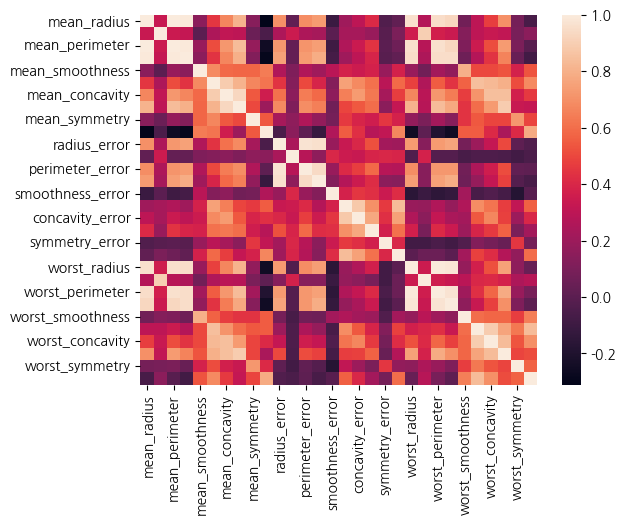

In [6]:
sns.heatmap(df_raw_x.corr().round(2))

- heatmap 상관계수를 통해 대략적인 상관수치를 볼 수 있다

In [7]:
df_raw_x.corr().round(2)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
mean_radius,1.00,0.33,1.00,0.99,0.15,0.45,0.67,0.81,0.14,-0.31,...,0.96,0.27,0.95,0.93,0.07,0.30,0.47,0.70,0.08,-0.06
mean_texture,0.33,1.00,0.34,0.32,0.00,0.25,0.31,0.30,0.05,-0.05,...,0.36,0.90,0.37,0.34,0.13,0.30,0.33,0.31,0.09,0.15
mean_perimeter,1.00,0.34,1.00,0.99,0.19,0.51,0.72,0.84,0.18,-0.25,...,0.96,0.28,0.96,0.93,0.11,0.35,0.51,0.73,0.10,-0.01
mean_area,0.99,0.32,0.99,1.00,0.15,0.44,0.67,0.80,0.12,-0.29,...,0.95,0.25,0.95,0.95,0.06,0.27,0.44,0.66,0.04,-0.08
mean_smoothness,0.15,0.00,0.19,0.15,1.00,0.68,0.59,0.58,0.58,0.64,...,0.19,0.07,0.22,0.17,0.80,0.50,0.50,0.53,0.38,0.53
mean_compactness,0.45,0.25,0.51,0.44,0.68,1.00,0.89,0.81,0.67,0.62,...,0.48,0.26,0.55,0.44,0.57,0.85,0.83,0.80,0.51,0.68
mean_concavity,0.67,0.31,0.72,0.67,0.59,0.89,1.00,0.93,0.54,0.36,...,0.67,0.29,0.72,0.64,0.47,0.71,0.85,0.85,0.37,0.46
mean_concave_points,0.81,0.30,0.84,0.80,0.58,0.81,0.93,1.00,0.50,0.20,...,0.81,0.28,0.84,0.77,0.44,0.60,0.73,0.89,0.33,0.32
mean_symmetry,0.14,0.05,0.18,0.12,0.58,0.67,0.54,0.50,1.00,0.54,...,0.17,0.10,0.22,0.14,0.44,0.54,0.49,0.49,0.72,0.49
mean_fractal_dimension,-0.31,-0.05,-0.25,-0.29,0.64,0.62,0.36,0.20,0.54,1.00,...,-0.25,0.01,-0.19,-0.25,0.55,0.55,0.41,0.24,0.41,0.78


In [8]:
df_raw_x.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
mean_radius,320.0,15.710,3.746,7.691,13.050,15.125,18.520,28.110
mean_texture,320.0,20.323,4.151,9.710,17.460,20.215,22.500,39.280
mean_perimeter,320.0,103.050,25.836,47.920,84.845,100.100,121.550,188.500
mean_area,320.0,807.736,391.969,170.400,523.900,713.050,1075.250,2501.000
mean_smoothness,320.0,0.099,0.014,0.053,0.090,0.099,0.108,0.163
mean_compactness,320.0,0.123,0.057,0.027,0.081,0.115,0.156,0.345
mean_concavity,320.0,0.122,0.085,0.000,0.053,0.111,0.170,0.427
mean_concave_points,320.0,0.067,0.042,0.000,0.030,0.065,0.092,0.201
mean_symmetry,320.0,0.187,0.027,0.127,0.167,0.185,0.203,0.304
mean_fractal_dimension,320.0,0.063,0.007,0.050,0.057,0.061,0.067,0.097


In [9]:
# 변수 이름 저장
x_cols = df_raw_x.columns
# Scale 변환 : ndarray 형식
scaler = StandardScaler()
nd_scaled = scaler.fit_transform(df_raw_x)
# 변환된 데이터 및 형태 확인
print("Scaled Data : ",nd_scaled[:5].round(3))
print('Shape : ',nd_scaled.shape)

Scaled Data :  [[-0.158 -0.879 -0.166 -0.233 -0.745 -0.479 -0.551 -0.628 -0.997 -0.393
  -0.693 -1.741 -0.65  -0.516 -0.499 -0.513 -0.671 -0.865 -0.592 -0.457
  -0.149 -1.156 -0.154 -0.225  0.491  0.139 -0.094 -0.302  0.526  0.511]
 [-1.313 -2.561 -1.329 -1.15  -0.24  -1.154 -1.143 -1.2   -1.774  0.184
  -0.995 -1.649 -1.003 -0.784  0.325 -1.023 -1.067 -1.361 -0.892 -0.801
  -1.342 -2.517 -1.38  -1.124  0.254 -1.046 -1.159 -1.48  -1.388 -0.507]
 [ 0.695 -0.421  0.603  0.596 -0.947 -0.675 -0.478 -0.212 -0.899 -1.174
  -0.734 -1.505 -0.715 -0.471 -1.419 -1.058 -0.936 -1.127 -1.099 -1.269
   0.535 -0.143  0.445  0.432 -0.613 -0.367  0.004  0.173  0.224 -0.887]
 [-0.211 -1.301 -0.256 -0.309 -1.292 -0.661 -0.788 -0.834 -0.659 -0.834
  -0.774 -1.593 -0.712 -0.572 -1.276 -0.594 -0.557 -0.841 -1.011 -0.684
  -0.263 -1.491 -0.313 -0.354 -1.339 -0.169 -0.177 -0.458 -0.524 -0.221]
 [-0.754 -1.738 -0.82  -0.746 -2.095 -1.505 -1.175 -1.326 -1.934 -0.957
  -1.055 -1.518 -1.008 -0.763 -0.761 -0.826 -

In [10]:
# DataFrame 으로 저장
df_scaled = pd.DataFrame(nd_scaled, columns=x_cols)
df_scaled.head().round(3)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,-0.158,-0.879,-0.166,-0.233,-0.745,-0.479,-0.551,-0.628,-0.997,-0.393,...,-0.149,-1.156,-0.154,-0.225,0.491,0.139,-0.094,-0.302,0.526,0.511
1,-1.313,-2.561,-1.329,-1.150,-0.240,-1.154,-1.143,-1.200,-1.774,0.184,...,-1.342,-2.517,-1.380,-1.124,0.254,-1.046,-1.159,-1.480,-1.388,-0.507
2,0.695,-0.421,0.603,0.596,-0.947,-0.675,-0.478,-0.212,-0.899,-1.174,...,0.535,-0.143,0.445,0.432,-0.613,-0.367,0.004,0.173,0.224,-0.887
3,-0.211,-1.301,-0.256,-0.309,-1.292,-0.661,-0.788,-0.834,-0.659,-0.834,...,-0.263,-1.491,-0.313,-0.354,-1.339,-0.169,-0.177,-0.458,-0.524,-0.221
4,-0.754,-1.738,-0.820,-0.746,-2.095,-1.505,-1.175,-1.326,-1.934,-0.957,...,-0.951,-1.935,-0.998,-0.870,-1.784,-1.109,-1.094,-1.367,-1.071,-0.898


In [11]:
# 주성분 분석 : 주성분1(Prin1) - 주성분(prin30) 생성 및 저장
pca = PCA(n_components = 30)
nd_pca = pca.fit_transform(df_scaled)
# 생성된 주성분 점수 확인
print('PCA Data : ',nd_pca[:5])
# 생성된 주성분 점수 Row, Column 개수 확인
print('Shape : ',nd_pca.shape)

PCA Data :  [[-2.00389702e+00 -2.58058106e-01 -1.84890296e+00 -1.31467512e+00
   6.24726217e-01  7.89451676e-01  1.32108678e-01 -1.01407999e+00
   4.97472568e-01 -5.11154359e-01 -1.59476526e-01 -3.85870988e-04
  -1.78211309e-02 -6.72126362e-02  1.47199795e-01 -7.13592324e-02
  -1.35801647e-01  1.60993793e-01 -4.78160362e-01 -2.37147886e-01
   2.44216713e-01  1.64854061e-01  6.63767950e-02  1.80669748e-01
  -1.14558313e-03  8.63622562e-03 -6.86072623e-02  6.04830294e-04
   2.58020639e-02  1.41585915e-02]
 [-5.84906746e+00  2.11647637e-01 -1.68087360e-01 -2.95641861e+00
   1.83054388e+00 -4.05165090e-01  3.23010727e-01 -5.26610206e-01
   4.11091221e-01  1.33667857e-01 -6.39117982e-01 -1.75471721e-01
  -2.09690997e-01 -9.71313041e-02 -2.06895790e-01  1.35980861e-01
  -1.49034285e-01  9.55093848e-02 -1.27211295e-01 -1.48419478e-01
   1.08089523e-01  1.68014456e-01 -6.48893521e-02 -4.34769760e-02
   1.49143900e-02 -4.33905539e-02 -4.97770561e-02  1.20852801e-02
   1.49415519e-02  3.80181172

In [12]:
# 주성분 점수 저장 및 확인
df_pca = pd.DataFrame(nd_pca, columns = ['Prin1','Prin2','Prin3','Prin4','Prin5','Prin6','Prin7','Prin8','Prin9','Prin10',
                                        'Prin11','Prin12','Prin13','Prin14','Prin15','Prin16','Prin17','Prin18','Prin19','Prin20',
                                        'Prin21','Prin22','Prin23','Prin24','Prin25','Prin26','Prin27','Prin28','Prin29','Prin30'])
# 주성분 분석용 데이터와 주성분 점수 결합
df_scaled_pca = df_scaled.join(df_pca)
df_scaled_pca.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,Prin21,Prin22,Prin23,Prin24,Prin25,Prin26,Prin27,Prin28,Prin29,Prin30
0,-0.157678,-0.879112,-0.165550,-0.232872,-0.744948,-0.479220,-0.550769,-0.628488,-0.997431,-0.392627,...,0.244217,0.164854,0.066377,0.180670,-0.001146,0.008636,-0.068607,0.000605,0.025802,0.014159
1,-1.312779,-2.560965,-1.328928,-1.150194,-0.240274,-1.153621,-1.143404,-1.199934,-1.773612,0.184077,...,0.108090,0.168014,-0.064889,-0.043477,0.014914,-0.043391,-0.049777,0.012085,0.014942,0.003802
2,0.695279,-0.420644,0.602798,0.596040,-0.947380,-0.675307,-0.477679,-0.212084,-0.899042,-1.174101,...,-0.034971,-0.296615,-0.089094,-0.111252,-0.078950,-0.050892,0.067030,0.030987,0.012601,-0.003082
3,-0.211154,-1.301385,-0.255876,-0.308762,-1.291796,-0.661126,-0.788224,-0.834410,-0.658535,-0.834209,...,-0.009942,-0.103717,0.066354,0.105339,-0.013316,-0.011097,-0.021080,0.033756,-0.021498,0.005064
4,-0.753945,-1.738136,-0.820314,-0.745704,-2.095198,-1.505004,-1.175403,-1.326415,-1.933950,-0.956793,...,0.072100,0.129423,-0.003367,0.020147,-0.045760,0.052844,-0.065091,0.017130,0.021292,-0.001706


In [13]:
# 주성분 분석 통계량 저장: 주성분 번호 , Eigenvalue, Eigenvalue ratio
df_pca_stat = pd.DataFrame()
df_pca_stat['PrinNo'] = [i for i in range(1,31)]
df_pca_stat['EigenValues'] = pca.explained_variance_
df_pca_stat['EigenValueRatio'] = pca.explained_variance_ratio_
df_pca_stat['CumEigenValueRatio'] = np.cumsum(pca.explained_variance_ratio_)
df_pca_stat.round(3)

,PrinNo,EigenValues,EigenValueRatio,CumEigenValueRatio
0,1,13.125,0.436,0.436
1,2,5.982,0.199,0.635
2,3,3.116,0.104,0.738
3,4,1.950,0.065,0.803
4,5,1.319,0.044,0.847
5,6,1.252,0.042,0.889
6,7,0.749,0.025,0.914
7,8,0.534,0.018,0.931
8,9,0.376,0.012,0.944
9,10,0.321,0.011,0.954


- 적정 주성분 선택
- 상관계수 기준 고유값이 1보다 큰 Prin1, Prin2, Prin3, Prin4, Prin5, Prin6 -> 6개 선택
- 공분산 기준 고유값 누적비율이 0.889 까지 6개 선택

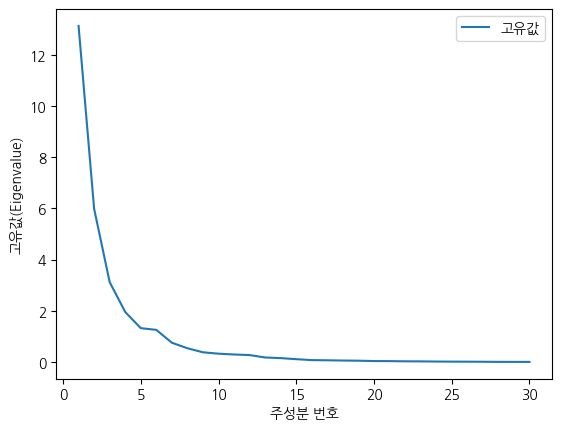

In [14]:
# 주성분 분석 및 결과 : scree plot 확인 및 주성분 개수 결정
# Scree plot
plt.plot(df_pca_stat['PrinNo'], df_pca_stat['EigenValues'],label='고유값')
# 그래프 label, legend
plt.ylabel('고유값(Eigenvalue)')
plt.xlabel('주성분 번호')
plt.legend(loc='best')

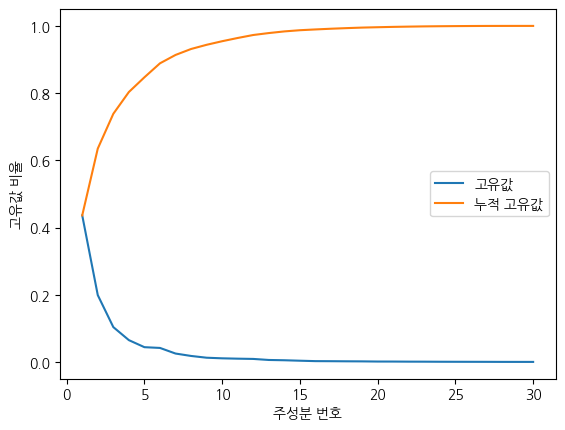

In [15]:
# 고유값 비율 그래프 생성
plt.plot(df_pca_stat['PrinNo'],
        df_pca_stat['EigenValueRatio'],label='고유값')
# 누적된 고유값 비율 그래프 생성
plt.plot(df_pca_stat['PrinNo'],
        df_pca_stat['CumEigenValueRatio'],label='누적 고유값')
plt.ylabel('고유값 비율')
plt.xlabel('주성분 번호')
plt.legend(loc='best')

In [16]:
# 주성분 분석 및 결과 : 고유 벡터 확인 및 해석
# 주성분 분석 데이터의 변수 이름
x_cols = pd.DataFrame({"Feature":df_raw_x.columns})
# 주성분 prin1 ~ prin6 까지 고유벡터 저장
# 전치결과 pd.DataFRame(pca.components_, columns = ['Prin1','Prin2','Prin3',...,'Prin30']),axis=1
# 파이썬 pca 분석시 SVD 연산 방식의 차이 반영(전치 , 부호 변경)
df_eigenvector = pd.concat([x_cols, pd.DataFrame(pca.components_.T * -1 , columns = ['Prin1','Prin2','Prin3','Prin4','Prin5','Prin6','Prin7','Prin8','Prin9','Prin10',
                                        'Prin11','Prin12','Prin13','Prin14','Prin15','Prin16','Prin17','Prin18','Prin19','Prin20',
                                        'Prin21','Prin22','Prin23','Prin24','Prin25','Prin26','Prin27','Prin28','Prin29','Prin30'])], axis=1)
df_eigenvector.round(3)

,Feature,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6,Prin7,Prin8,Prin9,...,Prin21,Prin22,Prin23,Prin24,Prin25,Prin26,Prin27,Prin28,Prin29,Prin30
0,mean_radius,-0.214,0.238,0.026,0.026,-0.007,-0.068,0.156,-0.097,-0.196,...,0.166,0.074,-0.078,0.131,0.070,-0.082,0.168,-0.180,-0.218,0.706
1,mean_texture,-0.110,0.046,0.038,-0.604,0.042,0.101,-0.030,0.138,0.097,...,-0.251,0.109,-0.136,-0.183,-0.070,-0.017,0.040,-0.002,0.006,0.002
2,mean_perimeter,-0.225,0.218,0.024,0.029,-0.010,-0.068,0.147,-0.106,-0.182,...,0.113,0.072,-0.027,0.048,0.095,-0.072,0.168,-0.087,-0.376,-0.689
3,mean_area,-0.213,0.245,-0.002,0.040,-0.010,-0.035,0.082,-0.048,-0.229,...,-0.032,-0.035,0.137,0.060,-0.114,0.142,-0.543,0.259,0.438,-0.042
4,mean_smoothness,-0.151,-0.194,0.058,0.201,-0.037,0.474,0.074,-0.196,-0.012,...,0.076,0.107,0.058,-0.064,0.008,-0.057,-0.069,-0.009,0.003,-0.007
5,mean_compactness,-0.240,-0.163,0.046,0.053,-0.024,-0.040,-0.025,-0.136,0.011,...,-0.184,0.053,-0.350,-0.201,0.202,0.266,-0.169,0.008,0.050,0.051
6,mean_concavity,-0.261,-0.046,0.003,0.046,-0.060,-0.019,0.107,-0.057,0.024,...,-0.259,-0.314,0.112,0.046,0.039,-0.637,-0.129,-0.056,0.011,0.021
7,mean_concave_points,-0.260,0.039,0.035,0.086,-0.008,0.067,0.154,-0.191,-0.009,...,0.092,-0.325,0.099,0.065,-0.168,0.527,0.291,0.029,0.004,0.003
8,mean_symmetry,-0.147,-0.197,0.047,0.138,0.428,0.061,0.054,-0.219,0.176,...,0.100,-0.003,0.064,0.021,-0.024,-0.026,0.008,-0.007,0.009,-0.001
9,mean_fractal_dimension,-0.076,-0.351,-0.000,0.080,-0.056,0.104,-0.290,-0.176,-0.104,...,0.116,0.181,0.092,0.247,-0.011,-0.079,0.125,0.008,-0.008,-0.003


- 고유값 확인 및 주성분 해석
- 1 주성분 : 암 세포의 특성 평균값, 암세포의 특성 오차, 암세포의 worst 특성에 대한 대부분의 변수와 양의 연관성을 가지고 있음(대표적 세포 특성값에 대한 양의 연관성)
- 2 주성분 : 암 세포가 매끄러움, 오목함, 조밀함 특성이 양의 연관성을 가지고 있음, 세포 조밀함, 오목함의 평균 오차, 암세포 윤곽의 오목한 부분 수에 음의 연관성이 커짐(세포 조밀함)
- 3 주성분 : 암세포 특성 대체적 평균값과 암세포의 worst 특성에 대한 대부분의 변수와 양의 연관성을 가지고 있으며 암세포의 특성 오차들과 클수록 음의 연관성이 커짐(세포 특성값)
- 4 주성분 : 암세포의 질감 평균과 평균오차에서 큰 음의 연관성이 존재함 그리고 암세포의 매끄러움과 양의 연관성을 가짐 (세포 매끄러움과 질감)
- 5 주성분 : 암세포 대칭성 평균과 평균오차, 제일 안좋은 암세포의 대칭성 평균값에서 큰 양의 연관성이 존재함 (세포 대칭성)
- 6 주성분 : 제일 안좋은 암세포의 매끄러움 평균값에서 큰 양의 연관성이 존재함 (세포 매끄러움)

<Axes: >

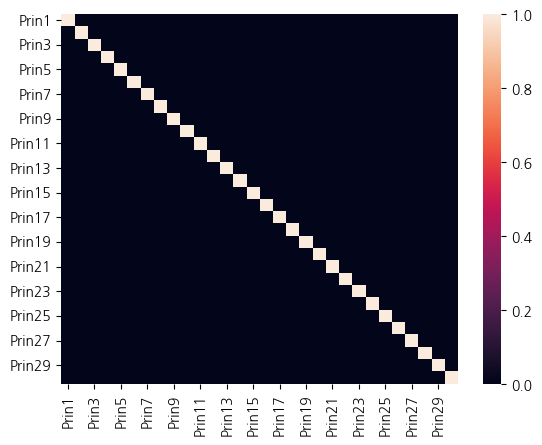

In [17]:
sns.heatmap(df_pca.corr().round(2))

- 주성분은 서로 독립 , 상관계수가 0 이다.

In [18]:
# 주성분 상관 / 회귀분석 : 회귀분석
# 다중선형 회귀분석 : 원천 데이터 활용
# 원천 데이터에 절편(const) 추가
df_raw_x_const = sm.add_constant(df_raw_x)
# 회귀모델 생성
reg_model = sm.OLS(df_raw_y, df_raw_x_const)
# 회귀모델 적합
reg_model = reg_model.fit()
# 모델 성능 확인
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:           diagnosis_음성   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     28.79
Date:                Wed, 02 Aug 2023   Prob (F-statistic):           1.12e-69
Time:                        21:43:24   Log-Likelihood:                 6.9483
No. Observations:                 320   AIC:                             48.10
Df Residuals:                     289   BIC:                             164.9
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [19]:
# 다중선형 회귀분석 " Scale 변환 데이터 활용
# Scale 변환 데이터에 절편(const) 컬럼 추가
df_scaled_const = sm.add_constant(df_scaled)
reg_model = sm.OLS(df_raw_y, df_scaled_const)
# 회귀모델 적합
reg_model = reg_model.fit()
# 모델 성능 확인
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:           diagnosis_음성   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     28.79
Date:                Wed, 02 Aug 2023   Prob (F-statistic):           1.12e-69
Time:                        21:43:24   Log-Likelihood:                 6.9483
No. Observations:                 320   AIC:                             48.10
Df Residuals:                     289   BIC:                             164.9
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [20]:
# 다중선형 주성분 회귀분석 : 주성분 점수(score) 데이터 활용
# Eigenvalue, Scree plot 기준으로 적정 주성분 선택
x_var = ['Prin1','Prin2','Prin3','Prin4','Prin5','Prin6']
# 선택된 주성분 데이터에 절편(const) 컬럼 추가
df_pca_const = sm.add_constant(df_pca[x_var])

# 회귀모델 생성
reg_model = sm.OLS(df_raw_y , df_pca_const)
# 회귀모델 적합
reg_model = reg_model.fit()
# 모델 성능 확인
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:           diagnosis_음성   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     88.78
Date:                Wed, 02 Aug 2023   Prob (F-statistic):           1.38e-64
Time:                        21:43:24   Log-Likelihood:                -55.358
No. Observations:                 320   AIC:                             124.7
Df Residuals:                     313   BIC:                             151.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6625      0.016     40.744      0.0

- 전체 설명변수를 이용한 모델보다 6개 주성분을 이용한 회귀모델의 설명력이 약 0.1 저하됨
- 기여율이 약한 나머지 주성분 24개를 제외하였지만 설명력이 저하됨
- 주성분 회귀분석의 회귀계수는 Prin5 를 제외하고는 유의함

<function matplotlib.pyplot.show(close=None, block=None)>

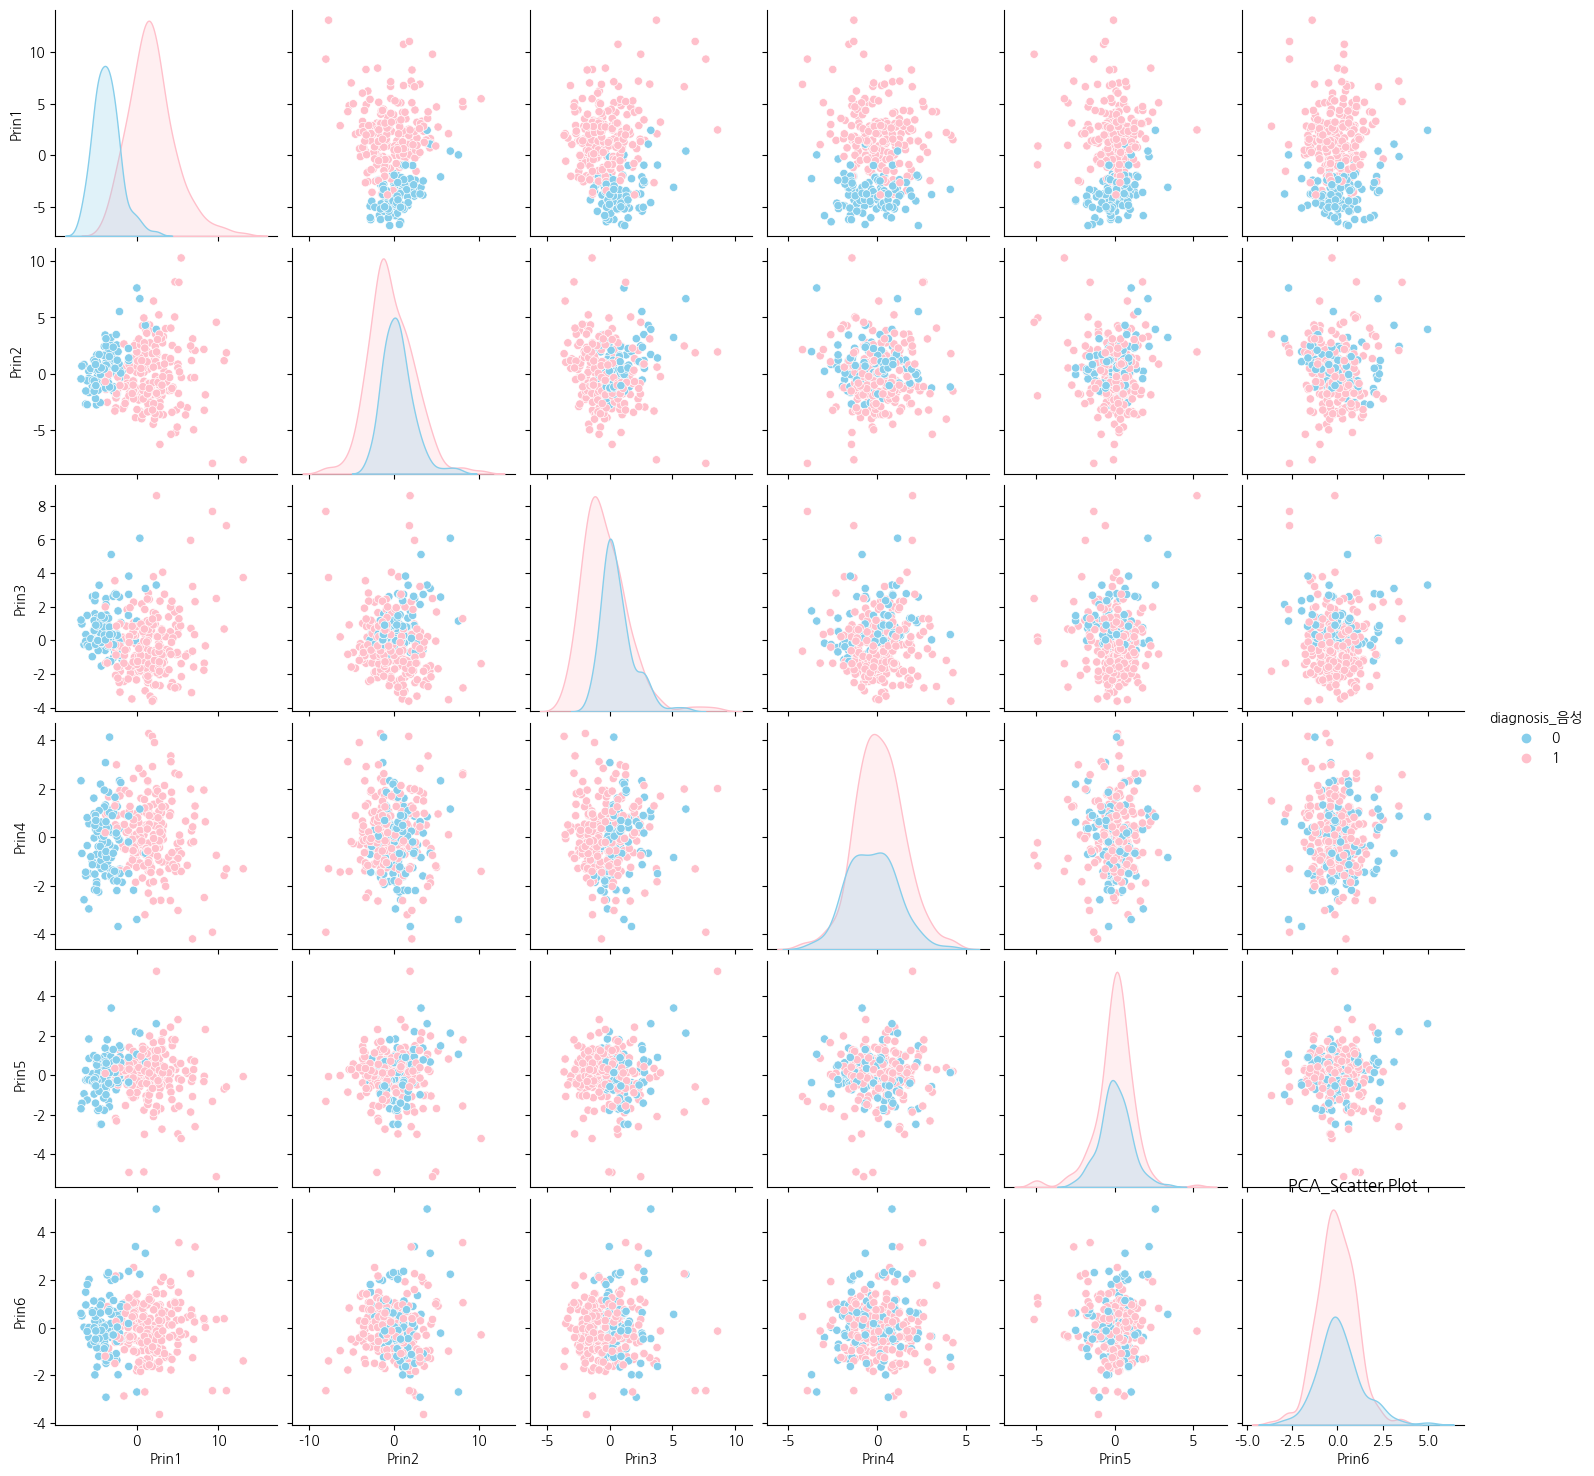

In [21]:
selected_columns = ['Prin1','Prin2','Prin3','Prin4','Prin5','Prin6']
df_selected = df_pca[selected_columns]
df_con = pd.concat([df_selected, df_raw_y],axis=1)

sns.pairplot(df_con,
            hue='diagnosis_음성',
            palette = ['skyblue','pink'])
plt.title('PCA_Scatter Plot')
plt.show

- 이를 통해 주성분 prin1 ~ prin6 (대표적 세포 특성값 ~ 세포 매끄러움)까지 암 판정
- 1 주성분 : 암 세포의 특성 평균값, 암세포의 특성 오차, 암세포의 worst 특성에 대한 대부분의 변수와 양의 연관성을 가지고 있음(대표적 세포 특성값에 대한 양의 연관성)
- 2 주성분 : 암 세포가 매끄러움, 오목함, 조밀함 특성이 양의 연관성을 가지고 있음, 세포 조밀함, 오목함의 평균 오차, 암세포 윤곽의 오목한 부분 수에 음의 연관성이 커짐(세포 조밀함)
- 3 주성분 : 암세포 특성 대체적 평균값과 암세포의 worst 특성에 대한 대부분의 변수와 양의 연관성을 가지고 있으며 암세포의 특성 오차들과 클수록 음의 연관성이 커짐(세포 특성값)
- 4 주성분 : 암세포의 질감 평균과 평균오차에서 큰 음의 연관성이 존재함 그리고 암세포의 매끄러움과 양의 연관성을 가짐 (세포 매끄러움과 질감)
- 5 주성분 : 암세포 대칭성 평균과 평균오차, 제일 안좋은 암세포의 대칭성 평균값에서 큰 양의 연관성이 존재함 (세포 대칭성)
- 6 주성분 : 제일 안좋은 암세포의 매끄러움 평균값에서 큰 양의 연관성이 존재함 (세포 매끄러움)
- 즉, PCA 통한 주성분을 통한 다중선형회귀 모델에서 0.6 설명력을 통해 모델의 성능을 설명할 수 있다